In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:

image_path = r"C:\E0323036-SEM6\dl_med\POSITIVE.jpeg"
xray = cv2.imread(image_path, 0)
if xray is None:
    print("Image not found")
else:
    print("Image found")

Image found


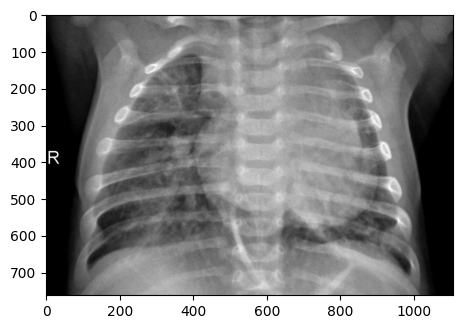

In [4]:
plt.figure(figsize =(12,8))
plt.subplot(2,2,1)
plt.imshow(xray,cmap='grey')

(np.float64(-0.5), np.float64(1105.5), np.float64(761.5), np.float64(-0.5))

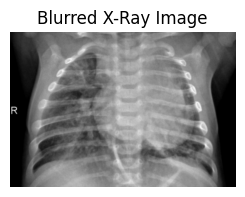

In [16]:
blurred_xray = cv2.GaussianBlur(xray, (5, 5), 0)
plt.subplot(1, 2, 2)
plt.title("Blurred X-Ray Image")
plt.imshow(blurred_xray, cmap='gray')
plt.axis('off')

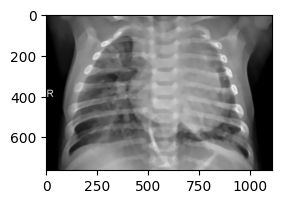

In [5]:
denoised = cv2.fastNlMeansDenoising(xray,None,10,7,21)
plt.subplot(2,2,2)
plt.imshow(denoised,cmap='grey')


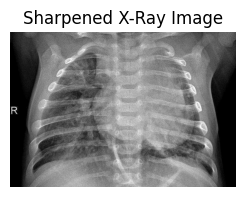

In [9]:
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])
sharpened_xray = cv2.filter2D(xray, -1, kernel)
plt.subplot(1, 2, 2)
plt.title("Sharpened X-Ray Image")
plt.imshow(sharpened_xray, cmap='gray')
plt.axis('off')

plt.show()

(np.float64(-0.5), np.float64(1105.5), np.float64(761.5), np.float64(-0.5))

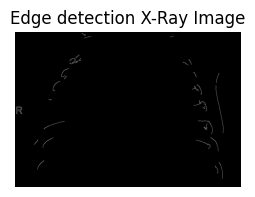

In [13]:
edges = cv2.Canny(xray, 100, 200)
plt.subplot(1, 2, 2)
plt.title("Edge detection X-Ray Image")
plt.imshow(edges, cmap='gray')
plt.axis('off')


(np.float64(-0.5), np.float64(1105.5), np.float64(761.5), np.float64(-0.5))

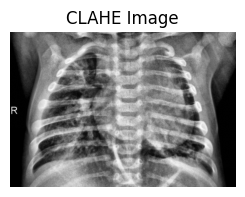

In [15]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
xray_clahe = clahe.apply(xray)

plt.subplot(1, 2, 2)
plt.title("CLAHE Image")
plt.imshow(xray_clahe, cmap='gray')
plt.axis('off')

In [21]:
hist_original = cv2.calcHist([xray], [0], None, [256], [0, 256]).flatten()
hist_clahe = cv2.calcHist([xray_clahe], [0], None, [256], [0, 256]).flatten()
hist_sharpened = cv2.calcHist([sharpened_xray], [0], None, [256], [0, 256]).flatten()
hist_edge = cv2.calcHist([edges], [0], None, [256], [0, 256]).flatten()
hist_blurred = cv2.calcHist([blurred_xray], [0], None, [256], [0, 256]).flatten()

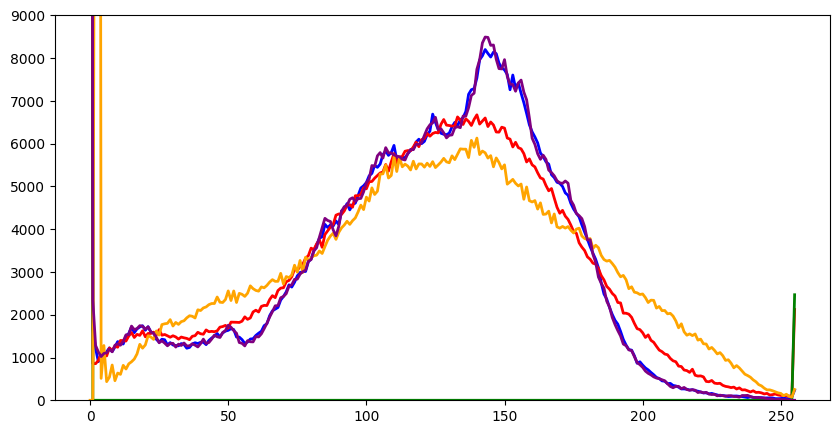

In [33]:

    plt.figure(figsize=(10, 5))
    plt.plot(hist_original, label='Original', color='blue', lw=2)
    plt.plot(hist_sharpened, label='Sharpened', color='red', lw=2)
    plt.plot(hist_edge, label='Edges (Canny)', color='green', lw=2)
    plt.plot(hist_clahe, label='CLAHE', color='orange', lw=2)
    plt.ylim(0, 9000)
    plt.plot(hist_blurred, label='Gaussian Blurred', color='purple', lw=2)
